In [2]:
import pandas as pd

In [66]:
df = pd.read_csv('HappinessAlcoholConsumption.csv')

####Общие данные

In [47]:
df

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97
...,...,...,...,...,...,...,...,...,...
117,Tanzania,Sub-Saharan Africa,south,3.666,533,878.000,36,6,1
118,Liberia,Sub-Saharan Africa,north,3.622,432,455.000,19,152,2
119,Benin,Sub-Saharan Africa,north,3.484,512,789.000,34,4,13
120,Togo,Sub-Saharan Africa,north,3.303,500,577.000,36,2,19


####Эксплораторный анализ
Основные показатели: mean - среднее значение

Второстепенные - max, min, квартили

In [56]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


#### Зависимость HDI и HappinessScore с разбивкой по регионам
Наблюдается прямая зависимость HDI (Human Development Index, Индекс человеческого развития по Программе развития ООН) и HappinessScore (Метрика, измеренная в 2016 году путем задания участникам выборки вопроса). HS растет вместе с ростом HDI. Таким образом люди с более высоким индексом развития получают больше удовольствия от потребления алкоголя.

In [108]:
df_region = df.groupby(by=['Region'],as_index=False).mean().sort_values(ascending=False, by='HappinessScore')
df_region[['Region', 'HDI', 'HappinessScore']]

,Region,HDI,HappinessScore
0,Australia and New Zealand,926.500000,7.323500
5,North America,922.000000,7.254000
8,Western Europe,908.350000,6.731400
3,Latin America and Caribbean,728.086957,6.061000
6,Southeastern Asia,727.800000,5.492000
2,Eastern Asia,824.500000,5.477000
4,Middle East and Northern Africa,760.363636,5.443727
1,Central and Eastern Europe,794.703704,5.383444
7,Sub-Saharan Africa,536.392857,4.151464


In [71]:
import matplotlib.pyplot as plt

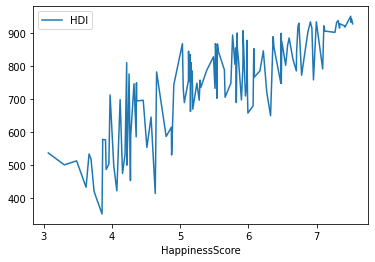

In [73]:
df.plot(x='HappinessScore', y='HDI')
plt.show()

#### Зависимость HDI и HappinessScore с разбивкой по полушариям
Люди, проживающие в северном полушарии, чувствуют себя более счастливыми, потребляя алкоголь

In [114]:
df_hemisphere = df.groupby(by=['Hemisphere'],as_index=False).mean().sort_values(ascending=False, by='HappinessScore')
df_hemisphere[['Hemisphere', 'HDI', 'HappinessScore']]

,Hemisphere,HDI,HappinessScore
0,both,717.400000,5.901600
1,north,760.427083,5.626438
2,south,657.095238,4.970619


In [62]:
df.loc[ df['Hemisphere'] == 'both' ]

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
15,Brazil,Latin America and Caribbean,both,6.952,758,8.639,245,145,16
29,Colombia,Latin America and Caribbean,both,6.481,747,5.757,159,76,3
44,Ecuador,Latin America and Caribbean,both,5.976,749,6.019,162,74,3
56,Peru,Latin America and Caribbean,both,5.743,748,6.031,163,160,21
95,Kenya,Sub-Saharan Africa,both,4.356,585,1.463,58,22,2


#### Пятерка стран с наивысшим показателем HappinessScore
Скандинавские страны и Дания

In [117]:
df.loc[ df['HappinessScore'] >= df['HappinessScore'].max() * 0.95, ['Country', 'Region', 'HappinessScore', 'HDI'] ].head(5)

,Country,Region,HappinessScore,HDI
0,Denmark,Western Europe,7.526,928
1,Switzerland,Western Europe,7.509,943
2,Iceland,Western Europe,7.501,933
3,Norway,Western Europe,7.498,951
4,Finland,Western Europe,7.413,918


#### Зависимость счастья от вида алкоголя
От потребления пива больше всего счастливы в Северной Америке

Вина - в Западной Европе

Крепкого алкоголя - в Восточной Европе


In [121]:
df_region = df.groupby(by=['Region'],as_index=False).mean().sort_values(ascending=False, by='Beer_PerCapita').head(5)
df_region[['Region', 'HDI', 'HappinessScore', 'Beer_PerCapita']]

,Region,HDI,HappinessScore,Beer_PerCapita
5,North America,922.000000,7.254000,244.500000
0,Australia and New Zealand,926.500000,7.323500,232.000000
8,Western Europe,908.350000,6.731400,216.450000
1,Central and Eastern Europe,794.703704,5.383444,170.074074
3,Latin America and Caribbean,728.086957,6.061000,159.478261


In [122]:
df_region = df.groupby(by=['Region'],as_index=False).mean().sort_values(ascending=False, by='Wine_PerCapita').head(5)
df_region[['Region', 'HDI', 'HappinessScore', 'Wine_PerCapita']]

,Region,HDI,HappinessScore,Wine_PerCapita
8,Western Europe,908.350000,6.731400,197.800000
0,Australia and New Zealand,926.500000,7.323500,193.500000
5,North America,922.000000,7.254000,92.000000
1,Central and Eastern Europe,794.703704,5.383444,83.814815
3,Latin America and Caribbean,728.086957,6.061000,35.782609


In [123]:
df_region = df.groupby(by=['Region'],as_index=False).mean().sort_values(ascending=False, by='Spirit_PerCapita').head(5)
df_region[['Region', 'HDI', 'HappinessScore', 'Spirit_PerCapita']]

,Region,HDI,HappinessScore,Spirit_PerCapita
1,Central and Eastern Europe,794.703704,5.383444,171.777778
2,Eastern Asia,824.500000,5.477000,149.750000
5,North America,922.000000,7.254000,140.000000
3,Latin America and Caribbean,728.086957,6.061000,109.913043
6,Southeastern Asia,727.800000,5.492000,104.600000


#### Индекс HappinessScore и GPD (Gross Domestic Product index, Индекс валового внутреннего продукта)
Страны с высоким индексом внутреннего валового продукта, наименее счастливы от употребления алкоголя


In [124]:
df_region = df.groupby(by=['Region'],as_index=False).mean().sort_values(ascending=False, by='GDP_PerCapita').head(5)
df_region[['Region', 'HDI', 'HappinessScore', 'GDP_PerCapita']]

,Region,HDI,HappinessScore,GDP_PerCapita
7,Sub-Saharan Africa,536.392857,4.151464,306.069107
5,North America,922.000000,7.254000,49.969000
8,Western Europe,908.350000,6.731400,45.973950
0,Australia and New Zealand,926.500000,7.323500,45.114500
3,Latin America and Caribbean,728.086957,6.061000,39.653957


##Выводы:

1. Наблюдается прямая зависимость между индексом человеческого развития и счастливого эмоционального фона при употребелнии алкоголя.
2. В Северном полушарии уровень счастья при употреблении алкоголя выше, чем в южном. Причем, чем севернее, тем счастливее население. Наиболее счастливы жители северных регионов - Исландия, Норвегия, Швеция, Финляндия, Дания.
3. Наблюдается региональная привязанность уровня счастья при употреблении алкоголя и вида алкоголя. Данная привязанность скорее всего основана на исторических и культурных традициях.
4. Важно! Страны с высоким индексом внутреннего валового продукта (в исследовании не указано о каком продукте идет речь, считаем - алкогольной продукции), испытывают наименьшее количество счастливых эмоций при употреблении алкоголя.